# **DataCamp Data Science Courses**
# **Extreme Gradient Boosting with XGBoost**

# Chap 1: Classification with XGBoost

In [2]:
# Import plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import xgboost as xgb
from sklearn.model_selection import train_test_split

### Welcome to the course!

Supervised Learning
- Regression: covered in chapter 2
- Classification
    - binary: predict a person will buy insurance
        - metric: AUC (Area under the ROC Curve)
    - multi-class: classifying the species of a given bird in an image
        - metric: accuracy score, confusion matrix

common classification models: logistic regression, decision trees.

Supervised Learning considerations  
- Features can be either numeric or categorical
- Numeric features should be scaled (Z-scored)
    - e.g. essential to train SVM models
- Categorical features should be encoded (one-hot)

Other kinds of Supervised Learning problems
- Ranking: Predicting an ordering on a set of choices
    - Google search suggestions
- Recommendation: Recommending an item to a user based on his/her consumption history and profile
    - Netflix

### Introducing XGBoost

- Optimized gradient-boosting machine learning library  
- Originally written in C++  
- Why it is popular  
    - Speed and performance
    - Core algorithm is parallelizable
    - Consistently outperforms single-algorithm methods
    - State-of-the-art performance in many ML benchmark datasets


In [ ]:
# Using XGBoost: A Quick Example

class_data = pd.read_csv("datasets/classification_data.csv")

X, y = class_data.iloc[:,:-1], class_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10, seed=123)

xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

In [7]:
# EXERCISES

In [ ]:
# XGBoost: Fit/Predict

# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

### What is a decision tree?

Decision Trees  
- Base learner - Individual learning algorithm in an ensemble algorithm
- Composed of a series of binary questions
- Predictions happen at the "leaves" of the tree
    - leaf nodes always contain decision values
- Constructed iteratively (one decision at a time)
    - Until a stopping criterion is met
- Individual decision trees tend to overfit
    - low bias, high variance
    - tend to overfit training data, and generalize poorly to new data
    

XGBoost
- Uses classification and regression trees (CART)
- Contain real-valued score in each leaf
    - regardless of classification or regression problem
    - can be thresholded to convert into categories for classification problems

In [15]:
# EXERCISES

In [12]:
# Decision trees

# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

In [13]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9649122807017544


### What is Boosting?

Boosting overview
- Not a specific machine learning algorithm
- Concept that can be applied to a set of machine learning models
    - "Meta-algorithm"
- Ensemble meta-algorithm used to convert many weak learners into a strong learner

- Weak learner: ML algorithm that is slightly better than chance
    - Example: Decision tree whose predictions are slightly better than 50%
- Boosting converts a collection of weak learners into a strong learner
- Strong learner: Any algorithm that can be tuned to achieve good performance

How boosting is accomplished
- Iteratively learning a set of weak models on subsets of the data
- Weighing each weak prediction according to each weak learner's performance
- Combine the weighted predictions to obtain a single weighted prediction that is much better than the individual predictions themselves!

Model evaluation through cross-validation  
- Cross-validation: Robust method for estimating the performance of a model on unseen data
- Generates many non-overlapping train/test splits on training data
- Reports the average test set performance across all data splits

In [ ]:
# Cross-validation in XGBoost example

class_data = pd.read_csv("classification_data.csv")

churn_dmatrix = xgb.DMatrix(data=churn_data.iloc[:,:-1],
                            label=churn_data.month_5_still_here)

params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=4,
                    num_boost_round=10, metrics="error", as_pandas=True)

print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

num_boost_round: number of trees to run

In [24]:
# EXERCISES

In [25]:
# Measuring accuracy

# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

A: 0.16251892949777494
B: 4.605170185988091
C: 0.7133498878774648


In [26]:
# Measuring AUC

# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

### When should I use XGBoost?


When to use XGBoost
- You have a large number of training samples
    - Greater than 1000 training samples and less 100 features
    - The number of features < number of training samples
- You have a mixture of categorical and numeric features
    - Or just numeric features

When NOT to use XGBoost
- Image recognition
- Computer vision
- Natural language processing and understanding problems
- When the number of training samples is significantly smaller than the number of features

# Chap 2: Regression with XGBoost

In [21]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Regression review

Common regression metrics
- Root mean squared error (RMSE)
    - Treats negative and positive differences equally
    - Tends to punish larger differences more than smaller ones
- Mean absolute error (MAE)
    - Not affected by large error values as RMSE
    - Lacks nice mathematical properties
    - Less frequently used as evaluation metric

Common regression algorithms
- Linear regression
- Decision trees
    - Can be used for both regression/classification tasks
    - Important building block for XGBoost models

### Objective (loss) functions and base learners

Loss/Objective Functions

- Quantifies how far off a prediction is from the actual result  
- Measures the difference between estimated and true values for some collection of data  
- **Goal**: Find the model that yields the minimum value of the loss function

- Loss function names in xgboost:
    - **reg:linear** - use for regression problems
    - **reg:logistic** - use for classification problems when you want just decision, not probability
    - **binary:logistic** - use when you want probability rather than just decision

Base Learners

- XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
- Individual models = base learners
    - Want base learners that are slightly better than random guessing for some part of data but are uniformly bad for the remaining majority of the data.
    - When combined they create final prediction that is **non-linear**
    - Each base learner should be good at distinguishing or predicting different parts of the dataset
- Two kinds of base learners: **tree** and **linear**

In [26]:
# TREES BASE LEARNERS example: Scikit-learn API

boston_data = pd.read_csv("datasets/boston.csv")
X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=10, seed=123)

xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 9.749041


In [28]:
# LINEAR BASE LEARNERS Example: Learning API Only

boston_data = pd.read_csv("datasets/boston.csv")
X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

# OPTIONS FOR BOOSTER: gbtree(default), gblinear or dart
params = {"booster":"gblinear","objective":"reg:linear"}

xg_reg = xgb.train(params = params, dtrain=DM_train,num_boost_round=10)
preds = xg_reg.predict(DM_test)

In [29]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 5.492696


In [33]:
# EXERCISES

In [42]:
# Decision trees as base learners

df = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X.shape,y.shape

((1460, 56), (1460,))

In [44]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


In [47]:
# Linear base learners

# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain= DM_train, params=params, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 43566.535658


In [50]:
# Evaluating model quality

# RMSE Model
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0   142980.433594    1193.791602    141767.531250      429.454591
1   104891.394532    1223.158855    102832.544922      322.469930
2    79478.937500    1601.344539     75872.615235      266.475960
3    62411.920899    2220.150028     57245.652344      273.625086
4    51348.279297    2963.377719     44401.298828      316.423666
4    51348.279297
Name: test-rmse-mean, dtype: float64


In [51]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   test-mae-mean  test-mae-std  train-mae-mean  train-mae-std
0  127634.000000   2404.009898   127343.482422     668.308109
1   90122.501954   2107.912810    89770.056641     456.965267
2   64278.558594   1887.567576    63580.791016     263.404950
3   46819.168946   1459.818607    45633.155274     151.883420
4   35670.646485   1140.607452    33587.090820      86.999396
4    35670.646485
Name: test-mae-mean, dtype: float64


### Regularization and base learners in XGBoost

Regularization

- Regularization is a control on model complexity
- Want models that are both accurate and as simple as possible
- Tweak parameters to limit model complexity by altering loss function
- Regularization parameters in XGBoost:
    - gamma 
        - for tree base learners
        - controls whether a node on base learner split based on the expected reduction in the loss that would occur after performing the split
        - higher values lead to fewer splits
        - minimum loss reduction allowed for a split to occur
    - alpha 
        - another name for l1 regularization 
        - penalty on leaf weights rather than feature weights, as is the case in linear or logistic regression
        - higher alpha values mean more regularization, causes many leaf weights in the base learners to be 0
    - lambda 
        - another name for l2 regularization
        - much smoother penalty than l1
        - causes leaf weights to smoothly decrease instead of enforcing strong sparsity constraints on the leaf weights as in l1.

In [52]:
# L1 Regularization in XGBoost example

boston_data = pd.read_csv("datasets/boston.csv")
X,y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]

boston_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:linear","max_depth":4}

l1_params = [1,10,100]
rmses_l1=[]

for reg in l1_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=boston_dmatrix, params=params,
                        nfold=4, num_boost_round=10,
                        metrics="rmse", as_pandas=True, seed=123)
    rmses_l1.append(cv_results["test-rmse-mean"] \
                    .tail(1).values[0])

In [53]:
print("Best rmse as a function of l1:")
print(pd.DataFrame(list(zip(l1_params,rmses_l1)),columns=["l1","rmse"]))

Best rmse as a function of l1:
    l1      rmse
0    1  3.461474
1   10  3.821152
2  100  4.645519


Base learners in XGBoost

- Linear Base Learner:
    - Sum of linear terms (same as in linear/logistic regression models)
    - When combined into an ensemble, the boosted model is weighted sum of linear models (thus is itself linear)
    - Don't get any nonlinear combination of features in the final model
    - Rarely used
- Tree Base Learner:
    - Decision trees as base model
    - When combined into an ensemble, boosted model is weighted sum of decision trees (nonlinear)
    - Almost exclusively used in XGBoost

In [54]:
# EXERCISES

In [57]:
# Using L2 regularization in XGBoost

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2       rmse
0    1   6.022222
1   10   7.201520
2  100  10.692151


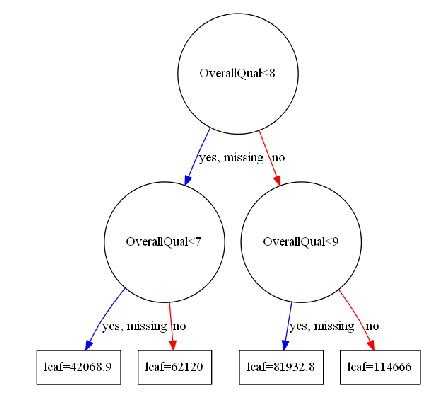

In [80]:
# Visualizing individual XGBoost trees

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams["figure.figsize"] = [7,7]
plt.show()

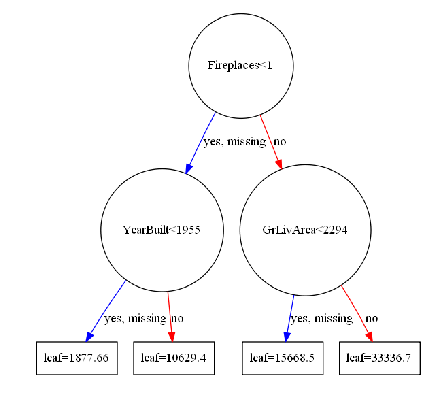

In [95]:
# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.rcParams["figure.figsize"] = [7,7]
plt.show()

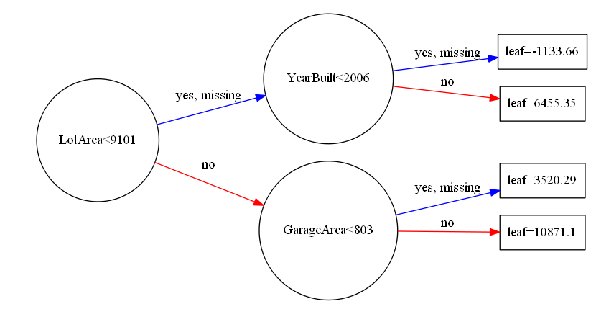

In [90]:
# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9,rankdir="LR")
plt.rcParams["figure.figsize"] = [10,10]
plt.show()

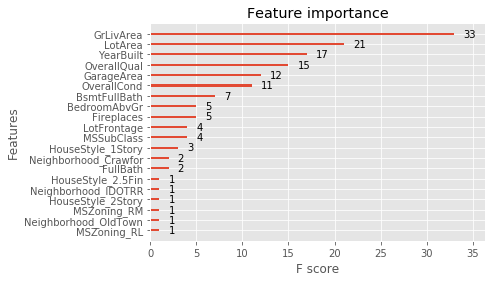

In [63]:
# Visualizing feature importances: What features are most important in my dataset

# Create the DMatrix: housing_dmatrix
df = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')
X, y = df.iloc[:,:-1],df.iloc[:,-1]
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {'objective':'reg:linear',
    'max_depth':4
}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=housing_dmatrix,params=params,num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# Chap 3: Fine-tuning your XGBoost model

In [64]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Why tune your model?

In [68]:
# Untuned Model Example

housing_data = pd.read_csv("datasets/ames_housing_trimmed_processed.csv")
X,y = housing_data[housing_data.columns.tolist()[:-1]],housing_data[housing_data.columns.tolist()[-1]]

housing_dmatrix = xgb.DMatrix(data=X,label=y)
untuned_params={"objective":"reg:linear"}

untuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,params=untuned_params,
                                 nfold=4,metrics="rmse",as_pandas=True,seed=123)

print("Untuned rmse: %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Untuned rmse: 34624.229980


In [69]:
# Tuned Model Example

housing_dmatrix = xgb.DMatrix(data=X,label=y)
tuned_params = {"objective":"reg:linear",'colsample_bytree': 0.3,
                'learning_rate': 0.1, 'max_depth': 5}

tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,params=tuned_params, 
                               nfold=4, num_boost_round=200, metrics="rmse",
                               as_pandas=True, seed=123)

print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Tuned rmse: 30187.115723


In [59]:
# EXERCISES

In [60]:
# Instantiate pipeline
# trains using the numeric column of the sample data

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric']],pd.get_dummies(sample_df['label']), 
    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


In [61]:
# Preprocessing numeric features
# Include all numeric features, add imputer for missing values

# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric', 'with_missing']],
    pd.get_dummies(sample_df['label']),random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test,y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


### Overview of XGBoosst's hyperparameters

In [62]:
# Preprocessing text features
sample_df.head()

,numeric,text,with_missing,label
0,-10.856306,,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(
    sample_df['text'],pd.get_dummies(sample_df['label']),random_state=2)

pl = Pipeline([
    ('vec', CountVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))])

In [64]:
pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print('accuracy on sample data: ', accuracy)

accuracy on sample data:  0.848


In [65]:
# Putting it all together
# Processing numeric and text data together

X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric','with_missing', 'text']], 
    pd.get_dummies(sample_df['label']), random_state=2)

In [66]:
# Transformation step
from sklearn.preprocessing import FunctionTransformer

get_text_data = FunctionTransformer(
    lambda x: x['text'],validate=False)

get_numeric_data = FunctionTransformer(
    lambda x: x[['numeric','with_missing']], validate=False)

In [68]:
# Union step (Only to show here. Used again next)
from sklearn.pipeline import FeatureUnion

#union = FeatureUnion([
#    ('numeric', numeric_pipeline),
#    ('text', text_pipeline)])

In [69]:
# PUTTING IT ALL TOGETHER
numeric_pipeline = Pipeline([
    ('selector', get_numeric_data),
    ('imputer', Imputer())])

text_pipeline = Pipeline([
    ('selector', get_text_data),
    ('vectorizer', CountVectorizer())])

pl = Pipeline([
    ('union', FeatureUnion([
        ('numeric', numeric_pipeline),
        ('text', text_pipeline)])),
    
    ('clf', OneVsRestClassifier(LogisticRegression()))])

In [70]:
# Calling the pipeline
pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print('accuracy on sample data: ', accuracy)

accuracy on sample data:  0.936


In [71]:
# EXERCISES

In [72]:
# Preprocessing text features

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(
    sample_df['text'],pd.get_dummies(sample_df['label']),random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
    ('vec', CountVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))])

# Fit to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test,y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


In [73]:
# Multiple types of processing: FunctionTransformer

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


In [74]:
# Multiple types of processing: FeatureUnion

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric', 'with_missing', 'text']],
    pd.get_dummies(sample_df['label']),random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


### Review of Grid Search and Random Search

In [75]:
# Main dataset: lots of text

LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
          'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

NON_LABELS = [c for c in df.columns if c not in LABELS]

len(NON_LABELS) - len(NUMERIC_COLUMNS)

14

In [76]:
# Using pipeline with the main dataset

dummy_labels = pd.get_dummies(df[LABELS])

X_train, X_test, y_train, y_test = multilabel_train_test_split(
    df[NON_LABELS], dummy_labels,0.2)

In [77]:
get_text_data = FunctionTransformer(
    combine_text_columns,validate=False)

get_numeric_data = FunctionTransformer(
    lambda x:x[NUMERIC_COLUMNS], validate=False)

In [78]:
pl = Pipeline([
    ('union', FeatureUnion([
        ('numeric_features', Pipeline([
            ('selector', get_numeric_data),
            ('imputer', Imputer())
        ])),
        ('text_features', Pipeline([
            ('selector', get_text_data),
            ('vectorizer', CountVectorizer())
        ]))
    ])
    ),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

In [79]:
# Performance using Logistic Regression
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on real data, using Logistic Regression: ", accuracy)


Accuracy on real data, using Logistic Regression:  0.379863843608


In [80]:
# Easily try new models using pipeline
# Use Random Forest

from sklearn.ensemble import RandomForestClassifier

pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', Imputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', OneVsRestClassifier(RandomForestClassifier()))
])

In [81]:
# Performance using Random Forest
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on real data, using Random Forest: ", accuracy)


Accuracy on real data, using Random Forest:  0.900181125476


In [82]:
# EXERCISES

In [83]:
# Using FunctionTransformer on the main dataset

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(
    df[NON_LABELS], dummy_labels, 0.2, seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(
    combine_text_columns,validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(
    lambda x: x[NUMERIC_COLUMNS], validate=False)

In [84]:
# Add a model to the pipeline

# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train,y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.370895009681


### Limits of Grid Search and Random Search

In [86]:
# Adjust model/parameters to Improve accuracy

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.913359565299


# Chap 4: Using XGBoost in pipelines

In [87]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

This Chapter introduces the Log-Loss evaluation metric.

In [88]:
###########################################
# DEFINITION OF compute_log_loss 
# STILL HAVE TO OBSERVE HOW TO USE IT FOR 
# MULTICLASS CLASSIFICATION
###########################################
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
    actual when these are 1D arrays.
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our
    predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted) + 
                        (1 - actual) * np.log(1 - predicted))
    return loss

### Review of pipelines using sklearn

In [89]:
# N-grams and tokenization
txt = 'PETRO-VEND FUEL AND FLUIDS'
vec = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,ngram_range=(1, 2))

In [90]:
# EXERCISES

In [91]:
# How many tokens?
SAMPLE_STRING = "'PLANNING,RES,DEV,& EVAL"
# Total tokens = 4, because , and & are not tokens

In [92]:
# Deciding what's a word

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])
len(text_features.get_feature_names())

['00a', '12', '1st', '2nd', '3rd', '4th', '5', '56', '5th', '6']


3171

In [93]:
# N-gram range in scikit-learn

# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(
    combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(
    lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(
                        token_pattern=TOKENS_ALPHANUMERIC,
                        ngram_range=(1,2)
                    )),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [95]:
# ADD LOG-LOSS EVALUATION
from sklearn.metrics import log_loss

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print log-loss score
y_pred = pl.predict_proba(X_test)
score = log_loss(y_test, y_pred, eps=1e-14)
print("\nLog loss score: ", score)


Log loss score:  22.963139039


The course exercise shows the log-loss score of 1.2681. The full dataset is giving different results.

### Incorporating XGBoost into pipelines

In [96]:
# Adding interaction features with scikit-learn

from sklearn.preprocessing import PolynomialFeatures
x = pd.DataFrame({'x1':[0,1],'x2':[1,1]},index=['a','b'])
x

,x1,x2
a,0,1
b,1,1


In [97]:
interaction = PolynomialFeatures(
    degree=2,interaction_only=True,include_bias=False)
interaction.fit_transform(x)

array([[ 0.,  1.,  0.],
       [ 1.,  1.,  1.]])

In [98]:
###########################################
# DEFINITION OF SparseInteractions
###########################################

from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from itertools import combinations

class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [99]:
SparseInteractions(degree=2).fit_transform(x).toarray()

array([[0, 1, 0],
       [1, 1, 1]], dtype=int64)

In [100]:
# EXERCISES

In [101]:
# Implement interaction modeling in scikit-learn

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [102]:
# EVALUATION: COMPUTATIONALLY EXPENSIVE
# ADD LOG-LOSS EVALUATION
from sklearn.metrics import log_loss

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print log-loss score
y_pred = pl.predict_proba(X_test)
score = log_loss(y_test, y_pred, eps=1e-14)
print("\nLog loss score: ", score)


Log loss score:  21.3401234138


The course exercise shows a log-loss score of 1.2256 which is an improvement from the previous value of 1.2681

### Tuning XGBoost hyperparameters

In [103]:
# EXERCISES

In [104]:
# Implementing the hashing trick in scikit-learn

# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(
    norm=None,non_negative=True,token_pattern=TOKENS_ALPHANUMERIC,ngram_range=(1,2))

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

     0
0  1.0
1  1.0
2  2.0
3  1.0
4  1.0


some text is hashed to the same value, but this doesn't neccessarily hurt performance.

In [105]:
# -----------------------------------------
# Build the winning model
# -----------------------------------------

# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(
                        token_pattern=TOKENS_ALPHANUMERIC,
                        non_negative=True, norm=None, 
                        binary=False, ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [106]:
# EVALUATION: USING HASHING VECTORIZER
# ADD LOG-LOSS EVALUATION
from sklearn.metrics import log_loss

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print log-loss score
y_pred = pl.predict_proba(X_test)
score = log_loss(y_test, y_pred, eps=1e-14)
print("\nLog loss score: ", score)


Log loss score:  21.339574683


Log loss: 1.2258. Performance is about the same, but this is expected since the HashingVectorizer should work the same as the CountVectorizer. Try this pipeline out on the whole dataset on your local machine to see its full power!

----

### Next steps and the social impact of your work

Quickly test ways of improving your submission
- NLP: Stemming, stop-word removal
- Model: RandomForest, k-NN, Naïve Bayes
- Numeric Preprocessing: Imputation strategies
- Optimization: Grid search over pipeline objects
- Experiment with new scikit-learn techniques